In [314]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

city_data_df=pd.read_csv(city_data_to_load,encoding="UTF-8",low_memory=False)
ride_data_df=pd.read_csv(ride_data_to_load,encoding="UTF-8",low_memory=False)
# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview
merged_city_ride_df=ride_data_df.merge(city_data_df, on="city",how="left")
merged_city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3908450000000,46,Urban


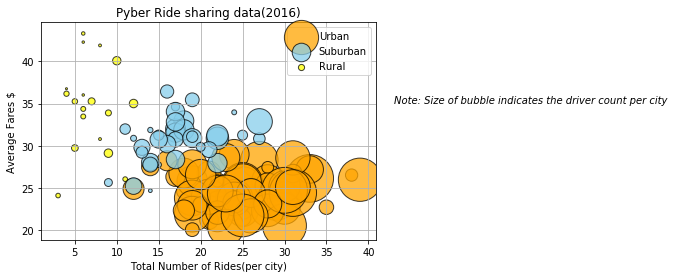

In [315]:
#ride_data_df.head()


 # Obtain the x and y coordinates for each of the three city types
mod_city_ride_df1 = merged_city_ride_df.loc[merged_city_ride_df["type"] == "Urban", :]
mod_city_ride_df2 = merged_city_ride_df.loc[merged_city_ride_df["type"] == "Suburban", :]
mod_city_ride_df3 = merged_city_ride_df.loc[merged_city_ride_df["type"] == "Rural", :]


mod_city_ride_df1 = mod_city_ride_df1.groupby(["city"])
avg_fare_per_city1 = round(mod_city_ride_df1["fare"].mean(), 2)
num_rides_per_city1 = mod_city_ride_df1["ride_id"].count()
driver_count_per_city1 = mod_city_ride_df1["driver_count"].sum()

mod_city_ride_df2 = mod_city_ride_df2.groupby(["city"])
avg_fare_per_city2 = round(mod_city_ride_df2["fare"].mean(), 2)
num_rides_per_city2 = mod_city_ride_df2["ride_id"].count()
driver_count_per_city2 = mod_city_ride_df2["driver_count"].sum()

mod_city_ride_df3 = mod_city_ride_df3.groupby(["city"])
avg_fare_per_city3 = round(mod_city_ride_df3["fare"].mean(), 2)
num_rides_per_city3 = mod_city_ride_df3["ride_id"].count()
driver_count_per_city3 = mod_city_ride_df3["driver_count"].sum()

textstr="Note: Size of bubble indicates the driver count per city"
fig, ax = plt.subplots()
ax.text(43,35,textstr, style='italic')
ax.scatter(num_rides_per_city1,avg_fare_per_city1,c="orange",s=driver_count_per_city1,edgecolor="black",label="Urban",alpha=0.75)
ax.scatter(num_rides_per_city2,avg_fare_per_city2,c="skyblue",s=driver_count_per_city2,edgecolor="black",label="Suburban",alpha=0.75)
ax.scatter(num_rides_per_city3,avg_fare_per_city3,c="yellow",s=driver_count_per_city3,edgecolor="black",label="Rural",alpha=0.75)
ax.legend()
plt.title("Pyber Ride sharing data(2016)")
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fares $")
ax.grid(True)
plt.savefig("../scatter_plot_ride_data.png")
plt.show()





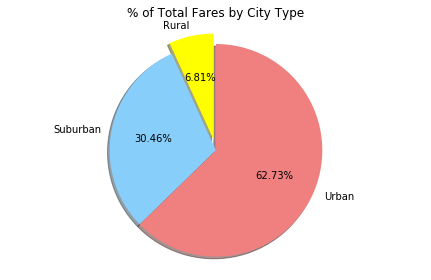

In [316]:
mod_city_ride1 = merged_city_ride_df.groupby(["type"])

avg_fare=mod_city_ride1["fare"].sum()
total_fare= merged_city_ride_df["fare"].sum()
avg_fare_city_type_df =pd.DataFrame( { "city_type" : ["Urban", "Suburban", "Rural"],"Avg_Fare_Rate" : round((avg_fare/total_fare)*100,2) })


City_Type = [ "Rural", "Suburban","Urban"]
Avg_Fare_Rate = [avg_fare_city_type_df["Avg_Fare_Rate"][0],avg_fare_city_type_df["Avg_Fare_Rate"][1],avg_fare_city_type_df["Avg_Fare_Rate"][2]]
explode = (0.1, 0, 0)
colors = ["yellow","lightskyblue","lightcoral"]
plt.pie(Avg_Fare_Rate,explode=explode,labels=City_Type,colors=colors,autopct="%1.2f%%",shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.axis("equal")
plt.savefig("../piechart_avg_fare.jpg")
plt.show()





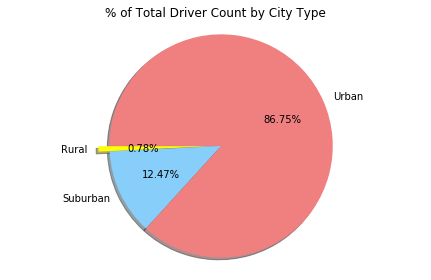

In [317]:
mod_city_ride2 = merged_city_ride_df.groupby(["type"])
driver_count=mod_city_ride2["driver_count"].sum()
total_driver_count= merged_city_ride_df["driver_count"].sum()
total_driver_city_type_df =pd.DataFrame( {"total_driver_rate" : round((driver_count/total_driver_count)*100,2) })
#total_driver_city_type_df

total_driver_rate = [total_driver_city_type_df["total_driver_rate"][0],total_driver_city_type_df["total_driver_rate"][1],total_driver_city_type_df["total_driver_rate"][2]]
City_Type = [ "Rural", "Suburban","Urban"]
explode = (0.1, 0, 0)
colors = ["yellow","lightskyblue","lightcoral"]
                     
plt.pie(total_driver_rate,explode=explode,labels=City_Type,colors=colors,autopct="%1.2f%%",shadow=True, startangle=180)
plt.title("% of Total Driver Count by City Type")
plt.tight_layout()
plt.axis("equal")
plt.savefig("../piechart_driver_count.jpg")
plt.show()



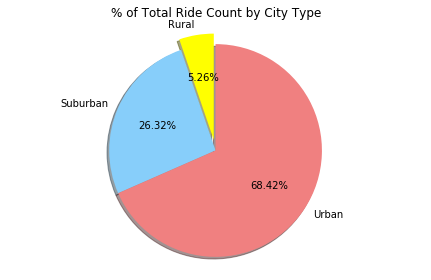

In [318]:
mod_city_ride3 = merged_city_ride_df.groupby(["type"])
ride_count=mod_city_ride3["ride_id"].count()
total_ride_count= merged_city_ride_df["ride_id"].count()
total_ride_city_type_df =pd.DataFrame( {"total_ride_rate" : round((ride_count/total_ride_count)*100,2) })
#total_driver_city_type_df

total_ride_rate = [total_ride_city_type_df["total_ride_rate"][0],total_ride_city_type_df["total_ride_rate"][1],total_ride_city_type_df["total_ride_rate"][2]]
City_Type = [ "Rural", "Suburban","Urban"]
explode = (0.1, 0, 0)
colors = ["yellow","lightskyblue","lightcoral"]
                     
plt.pie(total_ride_rate,explode=explode,labels=City_Type,colors=colors,autopct="%1.2f%%",shadow=True, startangle=90)
plt.title("% of Total Ride Count by City Type")
plt.tight_layout()
plt.axis("equal")
plt.savefig("../piechart_ride_count.jpg")
plt.show()

